In [101]:
# Importing the necessary libraries needed
from numpy import dot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns

import pickle

import math

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


def predict(age, gender, dep_count, months_book, tot_rel_count, months_inactive, cred_lim, tot_rev_bal, tot_amt_chng_q4_q1, tot_trans_amt, tot_trans_count, tot_ct_chng_q4_q1, avg_util_ratio, edu_level, marital_status, income_cat, card_cat):
    rf_model = None
    with open('best_rf_model', 'rb') as f:
        rf_model = pickle.load(f)
    
    scaler = None
    with open('scaler', 'rb') as f:
        scaler = pickle.load(f)
        
#     age = int(input("Age: 26 to 73|"))
#     gender = int(input("Gender: 0 for M, 1 for F|"))
#     dep_count = int(input("Dependent Count: 0 to 5|"))
#     months_book = int(input("Months on Book: 13 to 56|"))
#     tot_rel_count = int(input("Total Relationship Count: 1 to 6|"))
#     months_inactive = int(input("Months Inactive: 0 to 6|"))
#     cred_lim = int(input("Credit Limit: 1438 to 34516|"))
#     tot_rev_bal = int(input("Total Revolving Balance: 0 to 2517|"))
#     tot_amt_chng_q4_q1 = float(input("Total Amount Change Q4 Q1: 0.12 to 1.4|"))
#     tot_trans_amt = int(input("Total Transaction Amount: 510 to 18484|"))
#     tot_trans_count = int(input("Total Transaction Count: 10 to 139|"))
#     tot_ct_chng_q4_q1 = float(input("Total Count Change Q4 Q1: 0 to 1.42|"))
#     avg_util_ratio = float(input("Average Utilization Ratio: 0 to 0.999|"))
#     edu_level = int(input("Education Level: 0 for College, 1 for Doctorate, 2 for Graduate, 3 for High-School, 4 for Other, 5 for Post-Graduate, 6 for Uneducated|"))
#     marital_status = int(input("Marital Status: 0 for Divorced, 1 for Married, 2 for Single, 3 for Unknown|"))
#     income_cat = int(input("Income Category: 0 for 120K+, 1 for 40K-60K, 2 for 60K-80K, 3 for 80K-120K, 4 for 40K-, 5 for Unknown|"))
#     card_cat = int(input("Card Category: 0 for Blue, 1 for Gold, 2 for Platinum, 3 for Silver|"))
    
    edu_col = 0
    edu_doc = 0
    edu_gra = 0
    edu_hs = 0
    edu_o = 0
    edu_pg = 0
    edu_un = 0

    if edu_level == 0:
        edu_col = 1
    elif edu_level == 1:
        edu_doc = 1
    elif edu_level == 2:
        edu_gra = 1
    elif edu_level == 3:
        edu_hs = 1
    elif edu_level == 4:
        edu_o = 1
    elif edu_level == 5:
        edu_pg = 1
    else:
        edu_un = 1
    
    ms_di = 0
    ms_ma = 0
    ms_si = 0
    ms_uk = 0
    
    if marital_status == 0:
        ms_di = 1
    elif marital_status == 1:
        ms_ma = 1
    elif marital_status == 2:
        ms_si = 1
    else:
        ms_uk = 1
    
    ic_120 = 0
    ic_40 = 0
    ic_60 = 0
    ic_80 = 0
    ic_40l = 0
    ic_uk = 0
    
    if income_cat == 0:
        ic_120 = 1
    elif income_cat == 1:
        ic_40 = 1
    elif income_cat == 2:
        ic_60 = 1
    elif income_cat == 3:
        ic_80 = 1
    elif income_cat == 4:
        ic_40l = 1
    else:
        ms_uk = 1
    
    cc_bl = 0
    cc_gl = 0
    cc_pl = 0
    cc_sl = 0
    
    if card_cat == 0:
        cc_bl = 1
    elif card_cat == 1:
        cc_gl = 1
    elif card_cat == 2:
        cc_pl = 1
    elif card_cat == 3:
        cc_sl = 1
    
    df = pd.DataFrame([[age, gender, dep_count, months_book, tot_rel_count, months_inactive, cred_lim, tot_rev_bal, tot_amt_chng_q4_q1, tot_trans_amt, tot_trans_count, tot_ct_chng_q4_q1, avg_util_ratio, edu_col, edu_doc, edu_gra, edu_hs, edu_o, edu_pg, edu_un, ms_di, ms_ma, ms_si, ms_uk, ic_120, ic_40, ic_60, ic_80, ic_40l, ic_uk, cc_bl, cc_gl, cc_pl, cc_sl]], columns=['Customer_Age','Gender','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Credit_Limit','Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Education_Level_College','Education_Level_Doctorate','Education_Level_Graduate','Education_Level_High-School','Education_Level_Other','Education_Level_Post-Graduate','Education_Level_Uneducated','Marital_Status_Divorced','Marital_Status_Married','Marital_Status_Single','Marital_Status_Unknown','Income_Category_$120K +','Income_Category_$40K - $60K','Income_Category_$60K - $80K','Income_Category_$80K - $120K','Income_Category_Less than $40K','Income_Category_Unknown','Card_Category_Blue','Card_Category_Gold','Card_Category_Platinum','Card_Category_Silver'])
    

    num_col = ['Customer_Age', 'Gender', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',  'Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


    scaled_num = scaler.transform(df[num_col])
    scaled_df = pd.DataFrame(scaled_num, columns=num_col)
    df = df.drop(columns = num_col, axis=1)
    df = pd.concat([scaled_df, df], axis=1)
    return rf_model.predict(df)[0]

In [168]:
import pandas as pd
import numpy as np

excel_path = 'abc.xlsx'
df = pd.read_excel(excel_path)
data = df.to_numpy()
print(data)

[[1.0e+00 6.2e+01 2.0e+00 1.5e+01 0.0e+00 0.0e+00 4.0e+03 1.0e+03 1.0e+00
  5.0e+04 1.0e+03 1.0e+00 5.0e-01 1.0e+00 1.0e+00 3.0e+00 0.0e+00]
 [0.0e+00 5.5e+01 1.0e+00 4.0e+01 1.0e+00 1.0e+00 1.0e+03 1.0e+02 1.0e+00
  1.0e+03 3.0e+01 1.0e+00 1.0e+00 1.0e+00 0.0e+00 1.0e+00 1.0e+00]
 [1.0e+00 2.2e+01 0.0e+00 0.0e+00 1.0e+00 0.0e+00 3.0e+03 1.0e+03 1.0e+00
  1.0e+04 1.0e+02 1.0e+00 2.0e-01 2.0e+00 1.0e+00 2.0e+00 2.0e+00]]


In [252]:
def check_attrition(excel_path):
    
    attrition_count = 0
    num_rows = 0
    attrition_result = []
    
    df = pd.read_excel(excel_path)
    num_rows = df.shape[0]
    df = df.apply(pd.to_numeric, errors='coerce')

    # Count the number of rows removed
    rows_removed = np.sum(np.isnan(df).any(axis=1))

    # Remove rows with non-numeric values
    numeric_data = df.to_numpy()
    numeric_data = numeric_data[~np.isnan(numeric_data).any(axis=1)]

    for index, row in enumerate(numeric_data):

        row_dict = dict(zip(df.columns, row))

        if predict(**row_dict) == 1:
            attrition_count += 1
            attrition_result.append(1)
        else:
            attrition_result.append(0)

    attrition_rate = (attrition_count / (num_rows - rows_removed))
    
    #PLOT
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

    # Plotting Attrition vs Income Category
    sns.scatterplot(data=df, x=attrition_result, y='income_cat', ax=axes[0, 0])
    axes[0, 0].set_title('Attrition vs Income Category')
    axes[0, 0].set_xlabel('Attrition')
    axes[0, 0].set_ylabel('Income Category')
    axes[0, 0].set_xticks([0, 1])
    axes[0, 0].set_xticklabels(['Not Attrited', 'Attrited'])  # Set x-axis tick labels
    axes[0, 0].set_yticks(range(6))

    # Plotting Attrition vs Credit Limit
    sns.scatterplot(data=df, x=attrition_result, y='cred_lim', ax=axes[0, 1])
    axes[0, 1].set_title('Attrition vs Credit Limit')
    axes[0, 1].set_xlabel('Attrition')
    axes[0, 1].set_ylabel('Credit Limit')
    axes[0, 1].set_xticks([0, 1])
    axes[0, 1].set_xticklabels(['Not Attrited', 'Attrited'])  # Set x-axis tick labels
    axes[0, 1].set_yticks(range(6))

    # Plotting Attrition vs Total Revolving Balance
    sns.scatterplot(data=df, x=attrition_result, y='tot_rev_bal', ax=axes[0, 2])
    axes[0, 2].set_title('Attrition vs Total Revolving Balance')
    axes[0, 2].set_xlabel('Attrition')
    axes[0, 2].set_ylabel('Total Revolving Balance')
    axes[0, 2].set_xticks([0, 1])
    axes[0, 2].set_xticklabels(['Not Attrited', 'Attrited'])  # Set x-axis tick labels

    # Plotting Attrition vs Total Trans Count
    sns.scatterplot(data=df, x=attrition_result, y='tot_trans_count', ax=axes[1, 0])
    axes[1, 0].set_title('Attrition vs Total Trans Count')
    axes[1, 0].set_xlabel('Attrition')
    axes[1, 0].set_ylabel('Total Trans Count')
    axes[1, 0].set_xticks([0, 1])
    axes[1, 0].set_xticklabels(['Not Attrited', 'Attrited'])  # Set x-axis tick labels

    # Plotting Attrition vs Total Transaction Amount
    sns.scatterplot(data=df, x=attrition_result, y='tot_trans_amt', ax=axes[1, 1])
    axes[1, 1].set_title('Attrition vs Total Trans Amount')
    axes[1, 1].set_xlabel('Attrition')
    axes[1, 1].set_ylabel('Total Trans Amount')
    axes[1, 1].set_xticks([0, 1])
    axes[1, 1].set_xticklabels(['Not Attrited', 'Attrited'])  # Set x-axis tick labels

    # Plotting Attrition vs Avg Utilisation Ratio
    sns.scatterplot(data=df, x=attrition_result, y='avg_util_ratio', ax=axes[1, 2])
    axes[1, 2].set_title('Attrition vs Avg Utilisation Ratio')
    axes[1, 2].set_xlabel('Attrition')
    axes[1, 2].set_ylabel('Avg Utilisation Ratio')
    axes[1, 2].set_xticks([0, 1])
    axes[1, 2].set_xticklabels(['Not Attrited', 'Attrited'])  # Set x-axis tick labels

    # Show the plots
    plt.tight_layout()

    # Saving Plots
    plt.savefig('attrition_plots.png')

    if(num_rows == 1):
        return attrition_count
    else:
        return num_rows, rows_removed, attrition_count, attrition_rate, attrition_result

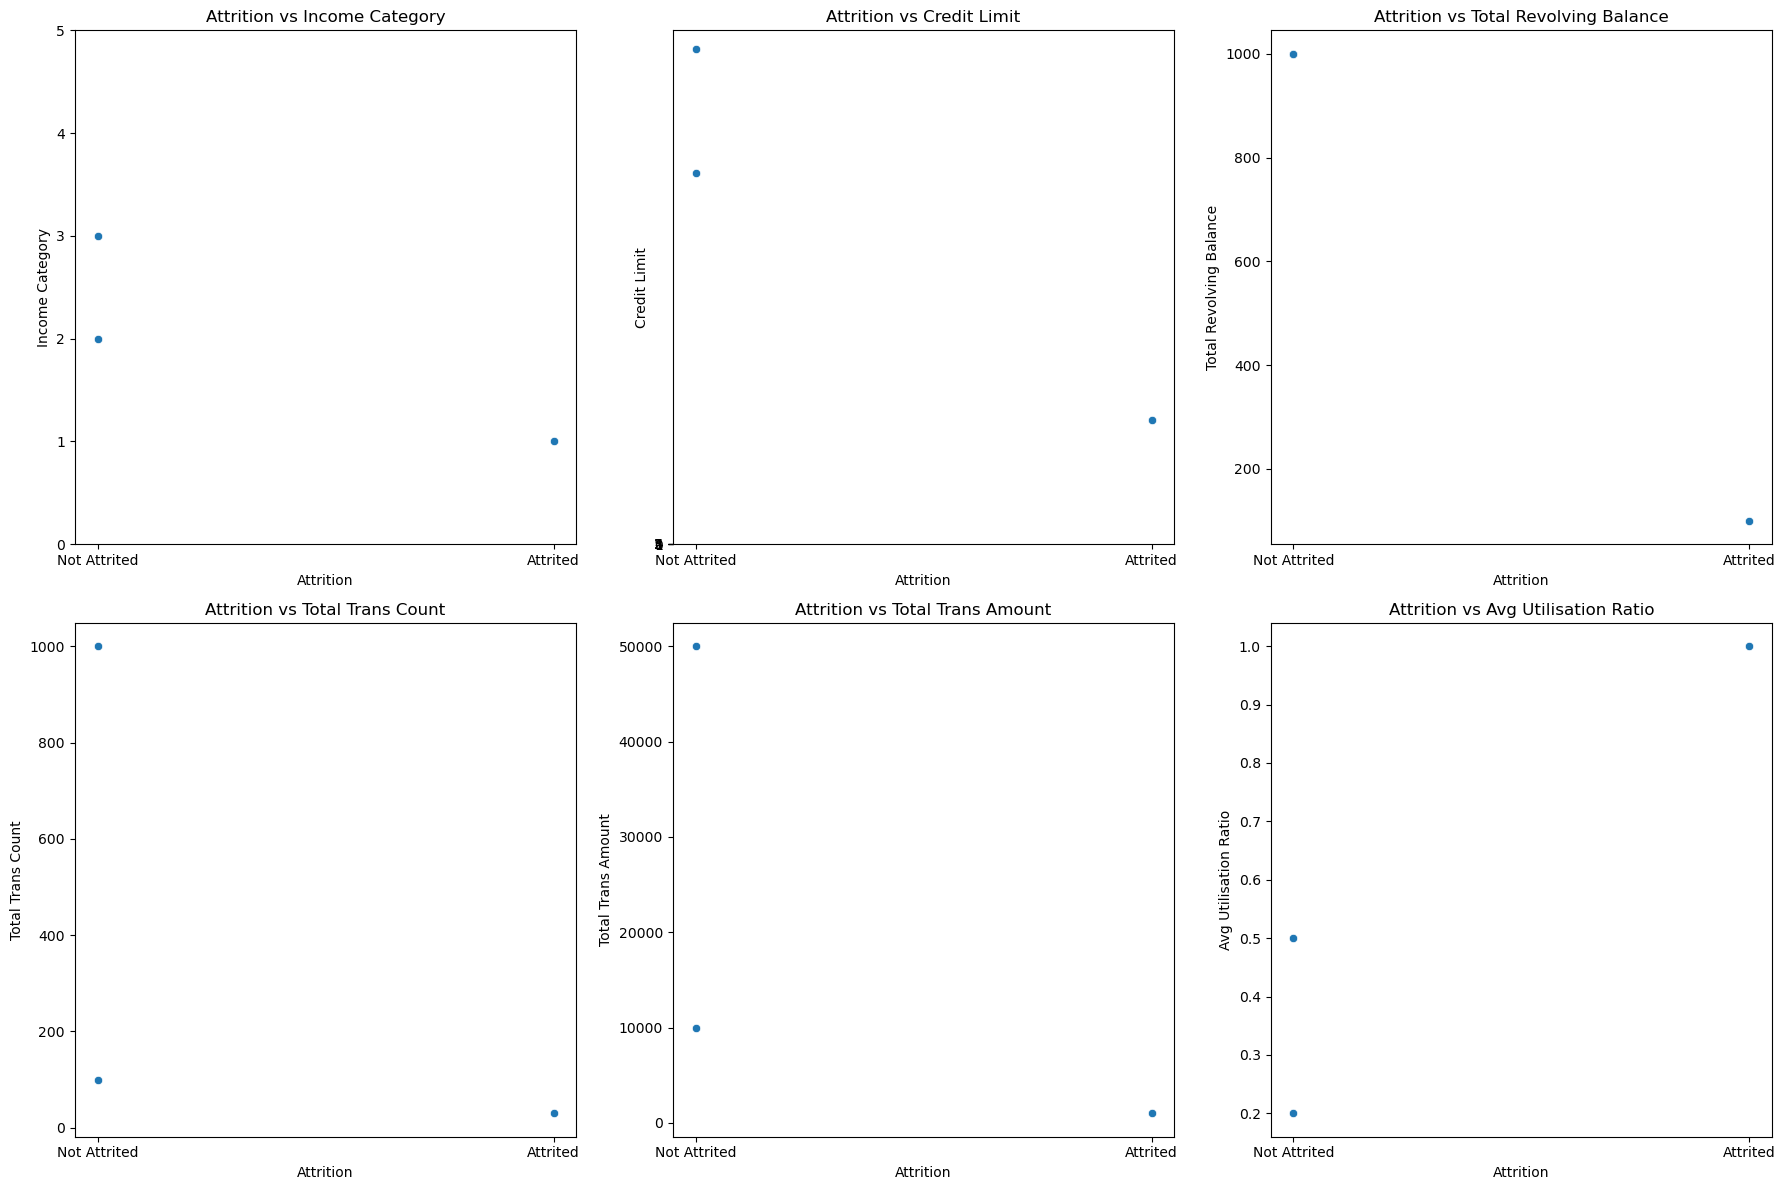

In [253]:
excel_path = 'abc.xlsx'
num_rows, rows_removed, attrition_count, attrition_rate, attrition_result = check_attrition(excel_path)

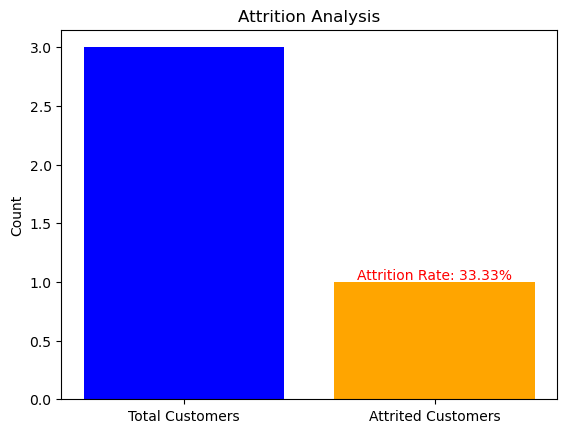

In [254]:
total_customers = num_rows - rows_removed

labels = ['Total Customers', 'Attrited Customers']
values = [total_customers, attrition_count]

plt.bar(labels, values, color=['blue', 'orange'])
plt.title('Attrition Analysis')
plt.ylabel('Count')
plt.text(1, attrition_count, f'Attrition Rate: {attrition_rate:.2%}', ha='center', va='bottom', color='red')
plt.show()

In [174]:
predict(
    age = 62, 
    gender = 1, 
    dep_count = 2, 
    months_book = 15, 
    tot_rel_count = 0, 
    months_inactive = 0, 
    cred_lim = 40000, 
    tot_rev_bal = 1000, 
    tot_amt_chng_q4_q1 = 1.047, 
    tot_trans_amt = 1000, 
    tot_trans_count = 60, 
    tot_ct_chng_q4_q1 = 1, 
    avg_util_ratio = 0.5, 
    edu_level = 1, 
    marital_status= 1, 
    income_cat = 3, 
    card_cat = 3)

0